<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/MachineLearningBook/Chapter10/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#Importing data


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full),(X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [39]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
float64


In [0]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]


Pullover


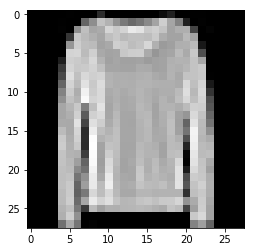

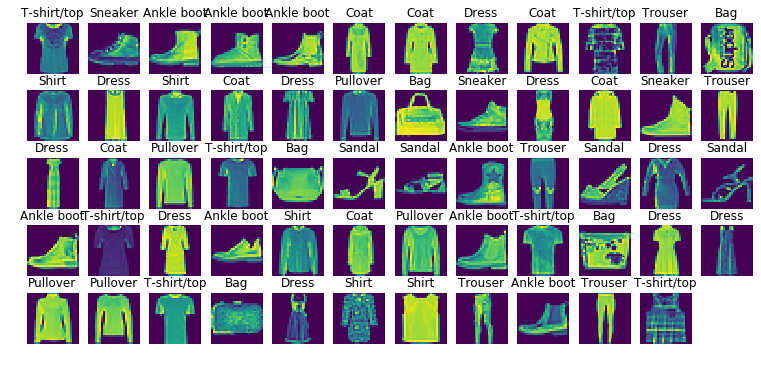

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[43]])
plt.imshow(X_train[43], cmap='gray')
fig = plt.figure(figsize=(13,6))
for i in range(1,60):
  ax = fig.add_subplot(5,12,i, title=class_names[y_train[i]])
  ax.axis('off')
  ax.imshow(X_train[i])
  

#Creating the Model Using the Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


also we can do the same as following:

```
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28])
        keras.layers.Dense(300, activation='relu')
        keras.layers.Dense(100, activation='relu')
        keras.layers.Dense(10, activation='softmax')
])
```

#Summary and picture of the network
you can find the picture in 'files' section of this notebook

In [9]:
model.summary()
keras.utils.plot_model(model, to_file='model.png')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#Accessing Layers

In [10]:
model.layers

In [11]:
print(model.layers[2].name)

dense_1


In [12]:
w,b = model.layers[1].get_weights()
print(w)

[[-0.02480729 -0.02081417  0.03535447 ...  0.00833232  0.06381041
  -0.05518536]
 [-0.03810149 -0.05140843 -0.00507288 ... -0.03951713 -0.07336073
   0.06747298]
 [ 0.06753522  0.02360137  0.0122558  ...  0.0202212   0.03507013
   0.05749725]
 ...
 [-0.06778248  0.06107208 -0.02583529 ... -0.00490576  0.04073113
  -0.03517338]
 [-0.07291046 -0.02861425  0.051221   ... -0.01637011 -0.02894951
  -0.00925279]
 [ 0.03297511 -0.00412171  0.03682047 ...  0.02427685  0.05333994
  -0.06189968]]


#Compiling the Model

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#Training and Evaluationg the Model


In [14]:
history = model.fit(X_train, y_train, epochs=10,batch_size=890,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 48us/sample - loss: 1.8141 - acc: 0.4859 - val_loss: 1.4146 - val_acc: 0.6478
Epoch 2/10
55000/55000 [==============================] - 2s 41us/sample - loss: 1.2365 - acc: 0.6570 - val_loss: 1.0668 - val_acc: 0.6858
Epoch 3/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.9966 - acc: 0.6975 - val_loss: 0.9061 - val_acc: 0.7200
Epoch 4/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.8756 - acc: 0.7290 - val_loss: 0.8166 - val_acc: 0.7470
Epoch 5/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.8017 - acc: 0.7492 - val_loss: 0.7576 - val_acc: 0.7614
Epoch 6/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.7510 - acc: 0.7640 - val_loss: 0.7138 - val_acc: 0.7740
Epoch 7/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.7128 - acc: 0.7748 - val_loss: 0.6

to assign weight to each class we can use
```
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights
```
class_weights will be a dictionary which we can pass it to the fit function 


In [0]:
print(X_train.shape, y_train.shape)
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights

#History object of ```fit()``` method



In [24]:
history.params

{'batch_size': 890,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 55000,
 'steps': None,
 'verbose': 0}

In [26]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [27]:
print(history.history)

{'loss': [1.814147031393918, 1.2365419868989425, 0.9965917182618922, 0.8755745991793545, 0.8017102661999789, 0.7509613681489771, 0.7128288410793652, 0.68262741485509, 0.6580736870765687, 0.6372652579979463], 'acc': [0.48592728, 0.6570182, 0.6975273, 0.729, 0.74923635, 0.76396364, 0.77483636, 0.78367275, 0.7904182, 0.79565454], 'val_loss': [1.4145719406604766, 1.0667945125102998, 0.9061406315565109, 0.8166008230447769, 0.757586299419403, 0.7137961781024933, 0.6807030738592148, 0.6544097529649735, 0.6321793726682663, 0.6136999286413193], 'val_acc': [0.6478, 0.6858, 0.72, 0.747, 0.7614, 0.774, 0.785, 0.793, 0.799, 0.8026]}


#Learning Curves

(0, 1)

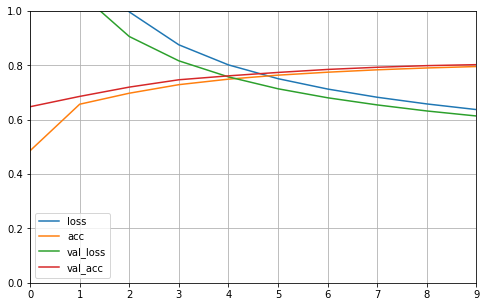

In [28]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

#Evaluatig Model

In [37]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 81us/sample - loss: 2.9667 - acc: 0.8129


[2.966743169784546, 0.8129]

In [38]:
X_new = X_test[14:18]
y_probability=model.predict(X_new)
y_probability

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)